# Algorithms in Computational Biology | Diego Serra
# Assignment 3: Sequencing by hybridization

### Sequencing by hybridization

Given an unknown DNA sequence, an array provides information about
all strings of length l that the sequence contains, but does not provide information about their positions in the sequence. For a string $s$ of length $l$, the $l$-mer composition or $spectrum$ is the multiset of $n-l + 1 l$-mers in $s$ and is written $Spectrum(s, l)$.

#### The objective of this code will be to to sequence a target DNA fragment from its DNA array data.

To solve this problem, I will based my approach on Graph theory and Eulerian path. Therefore, this work will be divided in 4 main steps :

1) Write a spectrum(s,l) function that will return a dictionnary that maps each length-l DNA sequence to the number of times it appears in s.

2) Write a graphFromSpectrum(A) function that will maps the (names of) the vertices to a list of the destinations of the directed edges that begin in that vertex. --> directed multigraph

3) Write a function EulerPath(G) that will find an Eulerian path in the constructed graph. 

4) Write a function stringFromPath(P) that will reconstruct the DNA sequence from the Eulerian path

### Step 1: $Spectrum(l,s)$

In [1]:
import itertools
import random

In [2]:
def spectrum(l, s):
    """ This function is used to return a dictionarry that maps all the possible l-mer to the number of times they appear 
        in the string.
        ::paramater:: l is the length of the desired l-mer. 
        ::parameter:: s is the original string from which the l-mer are derived.
        ::output:: spectrum is a dictionnary.
    """
    # Generation of the dictionnary with all possibe length-l DNA fragments.
    spectrum = {} 
    combinations = [''.join(i) for i in itertools.product('atgc', repeat = l)]
    
    for i in combinations:
        spectrum[i] = 0
    
    # Fill the dictionnary with the length-l s fragments.
    
    j = 0
    
    while j < len(s) - l + 1: # Max number of l-mer = len(s)-l+1
        
        spectrum[s[j:j+l]] += 1
        j+= 1
        
    return spectrum
        

In [3]:
def printSpectrum(spectrum): 
    """ This function is used to print out nicely the spectrum.
        ::param:: spectrum is a dictionnary that maps all the possible l-mer to the number of times they appear 
        in a string.
    """ 
        
    spacing = 0
    
    for key, val in spectrum.items():
            
        if spacing == 4: # 4 columns
            print('\n')
            spacing = 0
            
        print(key,val, end='  ')
        spacing += 1

In [4]:
def randomDNA(length):
    """ This function is used to return a random DNA sequence of length: lenght.
        ::param:: length is the length of the desired random sequence
        ::output:: random DNA sequence.
    """
    random_dna = "".join(random.choice('atgc') for i in range(length))
    
    return random_dna

<b>Function Test :</b>

In [5]:
random_dna = randomDNA(20)
print('Original string: ', random_dna)
print('')
S = spectrum(4, random_dna)
printSpectrum(S)

Original string:  tgacatgtgaattacatgtt

aaaa 0  aaat 0  aaag 0  aaac 0  

aata 0  aatt 1  aatg 0  aatc 0  

aaga 0  aagt 0  aagg 0  aagc 0  

aaca 0  aact 0  aacg 0  aacc 0  

ataa 0  atat 0  atag 0  atac 0  

atta 1  attt 0  attg 0  attc 0  

atga 0  atgt 2  atgg 0  atgc 0  

atca 0  atct 0  atcg 0  atcc 0  

agaa 0  agat 0  agag 0  agac 0  

agta 0  agtt 0  agtg 0  agtc 0  

agga 0  aggt 0  aggg 0  aggc 0  

agca 0  agct 0  agcg 0  agcc 0  

acaa 0  acat 2  acag 0  acac 0  

acta 0  actt 0  actg 0  actc 0  

acga 0  acgt 0  acgg 0  acgc 0  

acca 0  acct 0  accg 0  accc 0  

taaa 0  taat 0  taag 0  taac 0  

tata 0  tatt 0  tatg 0  tatc 0  

taga 0  tagt 0  tagg 0  tagc 0  

taca 1  tact 0  tacg 0  tacc 0  

ttaa 0  ttat 0  ttag 0  ttac 1  

ttta 0  tttt 0  tttg 0  tttc 0  

ttga 0  ttgt 0  ttgg 0  ttgc 0  

ttca 0  ttct 0  ttcg 0  ttcc 0  

tgaa 1  tgat 0  tgag 0  tgac 1  

tgta 0  tgtt 1  tgtg 1  tgtc 0  

tgga 0  tggt 0  tggg 0  tggc 0  

tgca 0  tgct 0  tgcg 0  tgcc 0  

tcaa 0  

### Step 2: $graphFromSpectrum(A)$

In [6]:
def graphFromSpectrum(spectrum):
    """ This function is used to return a dictionnary that will maps the (names of) the vertices to a list of 
        the destinations of the directed edges that begin in that vertex.
        ::param:: spectrum  is a dictionnary that maps  all the possible l-mer to the number of times they appear 
        in a string.
        ::output:: a Graph that maps the vertices to a list of adjencent vertices.
    """
    lmer = len(list(spectrum.keys())[0])-1 # Vertices are l-1 mer.  
    
    # All possible l-1 mer.
    
    lmer_list = [''.join(i) for i in itertools.product('atgc', repeat = lmer)]
    Graph = {i:[] for i in lmer_list}
    
    # Taking only the k-mer that are present at least 1x in the strings
    
    kmer_list = [] # list of tuples containing the kmer divided in their respective k-1mer 'ATG' --> ('AT', 'TG')
    
    for kmer in spectrum: 
            for i in range (spectrum[kmer]): # Number of times the kmer is present
                kmer_list.append((kmer[:len(kmer)-1], kmer[1:len(kmer)]))
    
    
    for el in range(len(kmer_list)): # Maps a vertex with its adjacent vertex 'ATG' --> ('AT', 'TG') --> {'AT': ['TG']}
        Graph[kmer_list[el][0]].append(kmer_list[el][1])
    
    return Graph
    
    

In [7]:
def printGraph(graph): 
    """ This function is used to print out nicely the graph.
    """
    
    for key, val in graph.items(): 
        
        print(key, ':', val, '\n')

<b>Function Test :</b>

In [8]:
G = graphFromSpectrum(S)
printGraph(G)

aaa : [] 

aat : ['att'] 

aag : [] 

aac : [] 

ata : [] 

att : ['tta'] 

atg : ['tgt', 'tgt'] 

atc : [] 

aga : [] 

agt : [] 

agg : [] 

agc : [] 

aca : ['cat', 'cat'] 

act : [] 

acg : [] 

acc : [] 

taa : [] 

tat : [] 

tag : [] 

tac : ['aca'] 

tta : ['tac'] 

ttt : [] 

ttg : [] 

ttc : [] 

tga : ['gaa', 'gac'] 

tgt : ['gtt', 'gtg'] 

tgg : [] 

tgc : [] 

tca : [] 

tct : [] 

tcg : [] 

tcc : [] 

gaa : ['aat'] 

gat : [] 

gag : [] 

gac : ['aca'] 

gta : [] 

gtt : [] 

gtg : ['tga'] 

gtc : [] 

gga : [] 

ggt : [] 

ggg : [] 

ggc : [] 

gca : [] 

gct : [] 

gcg : [] 

gcc : [] 

caa : [] 

cat : ['atg', 'atg'] 

cag : [] 

cac : [] 

cta : [] 

ctt : [] 

ctg : [] 

ctc : [] 

cga : [] 

cgt : [] 

cgg : [] 

cgc : [] 

cca : [] 

cct : [] 

ccg : [] 

ccc : [] 



### Step 2: $EulerPath(G)$

In [9]:
from copy import deepcopy

In [10]:
def CheckEulerian(graph): 
    """ This function is used to return if there is a possible eulerian path in a graph. Moreover, if it detects
        semibalanced vertex, it will return them (at most 2 which are starting and ending vertex).
        ::param:: a graph that maps the vertices to a list of adjencent vertices.
        ::output:: True/False if the graph contains an Euler path.
        ::output:: start/end if the graph has starting or ending vertex.
    """
    # Taking only the vertex that are present in the graph
    
    keys_dic  = [el for el in graph.keys() if graph[el] != []]
    values_dic = [el[::] for el in graph.values() if el != []]
    values_list =[]
    
    for el in  values_dic:
        for el2 in el:
            
            values_list.append(el2)
    
    # start and end are the vertex that might be semibalanced (there must be only one)
    
    start = []  # start has one more outdegree than indegree
    end = [] # end has one more indegree than outdegree
    
    # Balance --> The vertex has the same amount of outgoing edges (dic[key]) and incoming edges (number of times the vertex appear in values).
    # Semibalance --> the vertex has either one more outgoing edge or incoming edge. At most 2 for Euler path, the rest should be balanced.
    for el in keys_dic:
        
        indegree = values_list.count(el)
        outdegree = len(graph[el])
        
        if indegree != outdegree:
            
            if indegree - outdegree == 1: 
                
                end.append(el)
                
                if len(end) > 1:
                    
                    return False
                
            elif outdegree - indegree == 1:
                
                start.append(el)
                
                if len(start) > 1:
                    
                    return False
            else:
                
                return False
    
    
    return True, start, end

In [11]:
def EulerPath(graph): 
    """ This function is used to return an Eulerian path from a graph.
        ::parameter:: a graph that maps the vertices to a list of adjencent vertices.
        ::output:: 'No Euler path found' or Euler path.
    """
    
    Graph = deepcopy(graph) # Avoid modifying the initial graph if you want to reuse
    
    Euler, start, end = CheckEulerian(Graph)
    
     
    if Euler == True: # If it exists and eulerian path (see conditions)
        
    
        if len(start) == 0:
            start_v = random.choice(list(Graph.keys()))
        
        else: 
            start_v = start[0]
            
            
        temporary_path = [start_v]
        
        final_path = [] 

        while temporary_path != []:
                
            next_node = temporary_path[-1]
                
            if Graph[next_node] != []:
                    
                temporary_path.append(Graph[next_node][0])
                Graph[next_node].remove(Graph[next_node][0])
                
                    
            else:
                    
                temporary_path.pop(-1)
                final_path.insert(0, next_node)
                    
    
        return final_path

    
    else:
        
        return 'No Euler path possible'
        
    

<div class="alert alert-block alert-warning">
<b>Algorithm:</b>  The algorithm is based on the Hierholzer’s Algorithm.
</div>

<b>Function Test :</b>

In [12]:
P=EulerPath(G)
print(P)

['tga', 'gaa', 'aat', 'att', 'tta', 'tac', 'aca', 'cat', 'atg', 'tgt', 'gtg', 'tga', 'gac', 'aca', 'cat', 'atg', 'tgt', 'gtt']


### Step 4: $stringFromPath(P)$

In [13]:
def stringFromPath(path):
    """ Function used to return the concatenated string from the Euler path.
        ::param:: An Euler path. (i.e., list of strings)
        ::output:: the reconstructed DNA string.
    """
    
    string = path[0]
    
    for el in path[1::]:
        
        string += el[-1]
    return string   

<b>Function Test :</b>

In [14]:
string = stringFromPath(P)
print(string)

tgaattacatgtgacatgtt


## Final Test

In [15]:
random_dnatest = randomDNA(20)
print('Orginal Sequence ', random_dnatest)
print('\nSpectrum')
spectrumtest = spectrum(4, random_dnatest)
printSpectrum(spectrumtest)
print('')
print('\nGraph')
Graphtest = graphFromSpectrum(spectrumtest)
printGraph(Graphtest)
print('')
print('\nEuler Path')
E = EulerPath(Graphtest)
print(E)
print('')
String = stringFromPath(E)
print('Reconstructed string: ', end='')
print(String)
print('Are the reconstructed string and the Original string the same ?  ', end='')
print(random_dnatest == String)
print('Do the reconstructed string and the Original string have the same length ?  ', end='')
print(len(random_dnatest) == len(String))


Orginal Sequence  ccgtcggtgaattgatgagc

Spectrum
aaaa 0  aaat 0  aaag 0  aaac 0  

aata 0  aatt 1  aatg 0  aatc 0  

aaga 0  aagt 0  aagg 0  aagc 0  

aaca 0  aact 0  aacg 0  aacc 0  

ataa 0  atat 0  atag 0  atac 0  

atta 0  attt 0  attg 1  attc 0  

atga 1  atgt 0  atgg 0  atgc 0  

atca 0  atct 0  atcg 0  atcc 0  

agaa 0  agat 0  agag 0  agac 0  

agta 0  agtt 0  agtg 0  agtc 0  

agga 0  aggt 0  aggg 0  aggc 0  

agca 0  agct 0  agcg 0  agcc 0  

acaa 0  acat 0  acag 0  acac 0  

acta 0  actt 0  actg 0  actc 0  

acga 0  acgt 0  acgg 0  acgc 0  

acca 0  acct 0  accg 0  accc 0  

taaa 0  taat 0  taag 0  taac 0  

tata 0  tatt 0  tatg 0  tatc 0  

taga 0  tagt 0  tagg 0  tagc 0  

taca 0  tact 0  tacg 0  tacc 0  

ttaa 0  ttat 0  ttag 0  ttac 0  

ttta 0  tttt 0  tttg 0  tttc 0  

ttga 1  ttgt 0  ttgg 0  ttgc 0  

ttca 0  ttct 0  ttcg 0  ttcc 0  

tgaa 1  tgat 1  tgag 1  tgac 0  

tgta 0  tgtt 0  tgtg 0  tgtc 0  

tgga 0  tggt 0  tggg 0  tggc 0  

tgca 0  tgct 0  tgcg 0  tgcc 0  


### Question 1: Is your code guaranteed to reconstruct the original string?

The answer is no, my code does not guarantee to reconstruct the original string. This is inherent to the approach itself rather than the code. However, as the goal of an Eulerian path is to pass through every edges only once, the reconstructed string and the original string will always have the same lentgh.

To represent the case where the reconstructed string and the original string are not the same I decided to use the NetworkX module in python. Please make sure that your decorator has the latest version. You can use ``pip install decorator --upgrade``. Otherwise, please skip this part and refer at the png file added to the work.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
Graphic = nx.DiGraph()
node = [('A', {"color": "green"}),
       ('B', {"color": "red"}),
       ('C', {"color": "red"}),
       ('D', {"color": "red"}),
       ('E', {"color": "red"})]


Graphic.add_nodes_from(node)

edges = [('A','B'), ('B', 'C'), ('C', 'B'), ('B', 'D'), ('D','B'), ('B', 'E')]

Graphic.add_edges_from(edges)

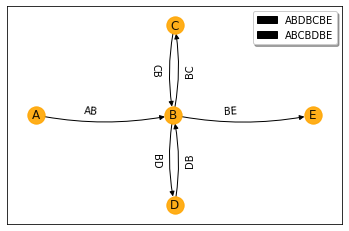

In [18]:
ax = plt.subplot()

nx.draw_networkx(Graphic, pos= {'A': [0,2], 'B': [1.982,2], 'C':[2,4], 'D':[2,0], 'E':[4,2]}, with_labels=True, 
                 node_color = 'orange', alpha = 0.9, edgelist = [])
nx.draw_networkx_edges(Graphic, pos= {'A': [0,2], 'B': [1.982,2], 'C':[2,4], 'D':[2,0], 'E':[4,2]}, 
                       connectionstyle='arc3, rad=0.1')
nx.draw_networkx_edge_labels(Graphic,pos={'A': [0,2], 'B': [2.15,2], 'C':[2.15,4], 'D':[2.15,0], 'E':[4,2]},
                             edge_labels= {('D', 'B'): 'DB', ('B','C'): 'BC'}, horizontalalignment='left')
nx.draw_networkx_edge_labels(Graphic,pos={'A': [0,2.2], 'B': [1.8,2], 'C':[1.8,4], 'D':[1.8,0], 'E':[4,2.2]},
                             edge_labels= {('C', 'B'): 'CB', ('B','D'):'BD', ('A', 'B'): 'AB', ('B','E'): 'BE'}, horizontalalignment='right')

plt.legend(['ABDBCBE', 'ABCBDBE'], shadow = True)
plt.show()

As we can notice on this graph two Euler path can be computed, these are different following the chosen path, either from B to C first or B to D first. At the end, we have the computed string have the same size.

### Question 2: What would happen if we did not allow edges to appear multiple times?

In the work we have a directed multigraph, this means that edges can appear multiple time. In the case where we would not allow the edges appearing multiple times, the algorithm would not reconstruct the original string. As we allow a single edge to appear, this means that there is only one connection between two similar nodes possible, therefore this would hinder the kmer repetitions in a string to be reconstructed. We would have a much shorter string than the original string.

 - Example : orignal string 'ATAT' in a graph where nodes length would be then 1 and edges of length 2. The reconstructed string would be 'ATA'.

### Question 3: What is the runtime of your functions ?

In [19]:
import timeit
import time

In [20]:
def plotruntime(f,n, lmer,lmertest, ntest, trials = 1, figsize = [5,5]):
    """ This function plots the runtime of a method in function of two parameters, either the length of the l-mer or 
        the lenght of the original string.
        ::param:: f is the method that will be tested (i.e., spectrum, graphFromSpectrum, EulerPath).
        ::param:: n is the length of the original string. range(starting_val, ending_val, stepsize) OR None
        ::param:: lmer is the length of the lmer. range(starting_val, ending_val, stepsize) OR None
        ::param:: lmertest (bool), True if you want to test for a fixed string length value and increasing lmer values.
        ::param:: ntest (bool), True if you want to test for a fixed lmer value and increasing string length values.
        ::param:: trials(int), used to repeat the time calculation, the time value will be averaged.
        ::output:: Plot y = runtime, x= length of the string OR length of the lmer.
    """

    
   # Spectrum(s,l) testing

    if f == spectrum and ntest == True:
        
        S= [randomDNA(m) for m in n]
        Times=[timeit.timeit(lambda:f(3,elem),number=trials)/trials for elem in S]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(n,Times, 'r')
        ax.set_xlabel("string length")
        ax.set_ylabel("Runtime")
        plt.title('Runtime of spectrum for 4-lmer')
        
    if f == spectrum and lmertest == True:    
        S= randomDNA(1000)
        Times=[timeit.timeit(lambda:f(elem,S),number=trials)/trials for elem in lmer]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(lmer,Times, 'r')
        ax.set_xlabel("lmer length")
        ax.set_ylabel("Runtime [s]")
        plt.title('Runtime of spectrum for a string of length 1000') 
            
            
    # graphFromSpectrum(A) testing
    
    if f == graphFromSpectrum and ntest == True:
        S= [randomDNA(m) for m in n]
        A = [spectrum(4, elem) for elem in S]
        Times=[timeit.timeit(lambda:f(i),number=trials)/trials for i in A ]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(n,Times,'r')
        ax.set_xlabel("string length")
        ax.set_ylabel("Runtime [s]")
        plt.title('Runtime of EulerPath for 4-lmer')
            
    
    if f == graphFromSpectrum and lmertest == True:    
        S= randomDNA(1000)
        A = [spectrum(elem,S) for elem in lmer]
        Times=[timeit.timeit(lambda:f(i),number=trials)/trials for i in A ]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(lmer,Times,'r')
        ax.set_xlabel("lmer length")
        ax.set_ylabel("Runtime [s]")
        plt.title('Runtime of graphFromSpectrum for a string of length 1000')  
        
        
    #EulerPath(G) testing
    
    if f == EulerPath and ntest == True:
        S= [randomDNA(m) for m in n]
        A = [spectrum(4, elem) for elem in S]
        G = [graphFromSpectrum(i) for i in A]
        Times=[timeit.timeit(lambda:f(j),number=trials)/trials for j in G ]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(n,Times,'r')
        ax.set_xlabel("string length")
        ax.set_ylabel("Runtime [s]")
        plt.title('Runtime of EulerPath for 4-lmer')   
    
        
    if f == EulerPath and lmertest == True:    
        S= randomDNA(1000)
        A = [spectrum(elem,S) for elem in lmer]
        G = [graphFromSpectrum(i) for i in A]
        Times=[timeit.timeit(lambda:f(j),number=trials)/trials for j in G ]
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(lmer,Times,'r')
        ax.set_xlabel("lmer length")
        ax.set_ylabel("Runtime [s]")
        plt.title('Runtime of EulerPath for a string of length 1000')    
        
        

### 1) $spectrum(l,s)$

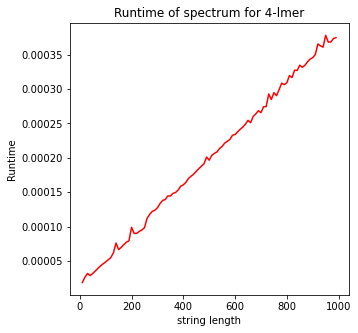

In [21]:
# Increasing string size
plotruntime(spectrum, n=range(10,1000,10), lmer=None ,lmertest = False, ntest = True, trials=30)

Increasing the length of the strings do not affect the computation of the spectrum for a fixed l-mer value. The runtime is <b>Linear </b>.

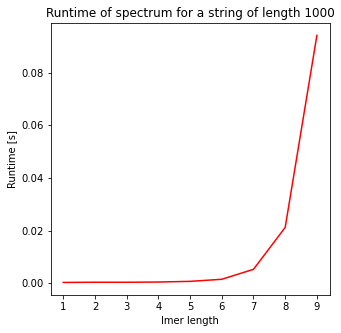

In [22]:
# Increasing l-mer size
plotruntime(spectrum, n=None, lmer=range(1,10,1),lmertest = True, ntest = False, trials=2)

However, increasing the size of the l-mer we observe that the runtime is increasing <b> exponentially </b>.

### 2) $graphFromSpectrum(A)$

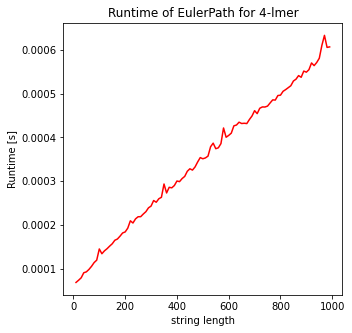

In [27]:
# Increasing string size
plotruntime(graphFromSpectrum, n=range(10,1000,10), lmer=None ,lmertest = False, ntest = True, trials=30)

Increasing the length of the strings do not affect the computation of the graphFromSpectrum for a fixed l-mer value. The runtime is <b>Linear </b>.

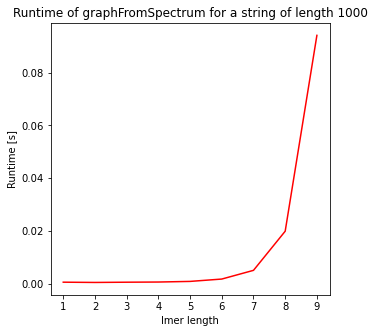

In [24]:
# Increasing l-mer size
plotruntime(graphFromSpectrum, n=None, lmer=range(1,10,1) ,lmertest = True , ntest = False, trials=2)

However, increasing the size of the l-mer we observe that the runtime is increasing <b> exponentially </b>.

### 3) $EulerPath(G)$

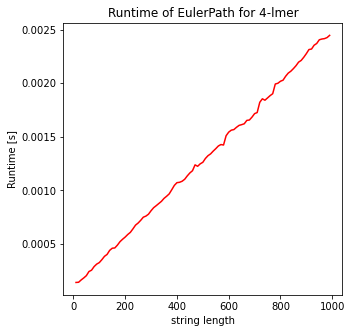

In [25]:
# Increasing string size
plotruntime(EulerPath, n=range(10,1000,10), lmer=None ,lmertest = False, ntest = True, trials=30)

Increasing the length of the strings do not affect the computation of the EulerPath for a fixed l-mer value. The runtime is <b>Linear </b>.

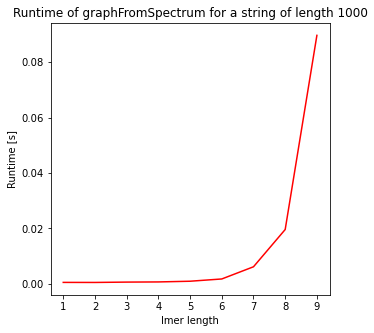

In [26]:
# Increasing lmer size
plotruntime(graphFromSpectrum, n=None, lmer=range(1,10,1) ,lmertest = True, ntest = False, trials=2)

However, increasing the size of the l-mer we observe that the runtime is increasing <b> exponentially </b>.

To conclude this work, I can notice that for a fixed l-mer value which I can assume being much smaller than the length of the string, no matter the length of the original string, my implemented algorithm will have a linear runtime. I can therefore conclude that the algorithm is efficient. However, a drawback of the algorithm is that it will not always return the same original string, even if the lenght will be always the same.

<div class="alert alert-block alert-info">
<b>Do not forget:</b> a PNG file with a Graph is annexed to the work</div>